In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/SATYAM KUMAR/Downloads/Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum().sum()

0

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df["customerID"].duplicated().sum()

0

In [10]:
def conv(value):
    if value == 1 :
        return "yes"
    else:
        return "no"
        
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)


#Converted 0 and 1 value of seniorcitizen to "yes" or "no" to make it easier to understand

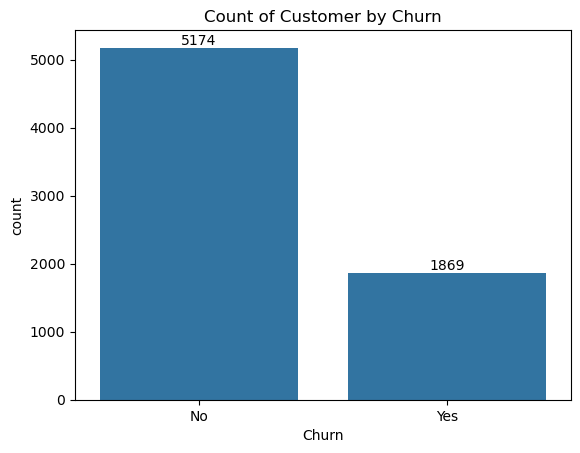

In [12]:
ax = sns.countplot(x = "Churn", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

In [13]:
gb = df.groupby("Churn").agg({"Churn" : "count"})
gb

,Churn
Churn,
No,5174
Yes,1869


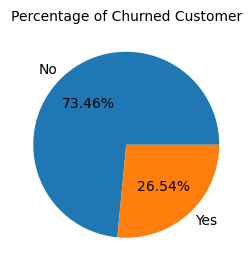

In [52]:
plt.figure(figsize = (3,4))
plt.pie(gb["Churn"],labels = gb.index , autopct = "%1.2f%%")
plt.title("Percentage of Churned Customer", fontsize = 10)
plt.show()


#from the given pie chart we can conclude that 26.54% of our customer have churned out .
#now let's explore the reson behind it

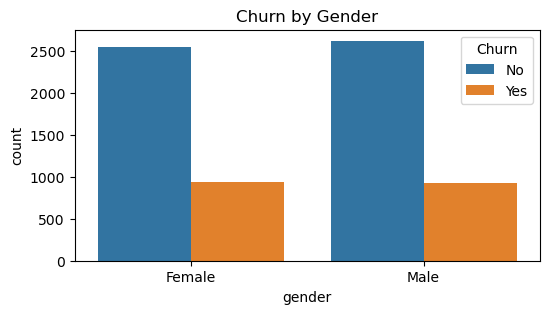

In [16]:
plt.figure(figsize = (6,3))
sns.countplot(x = "gender" , data = df , hue = "Churn")
plt.title("Churn by Gender")
plt.show()

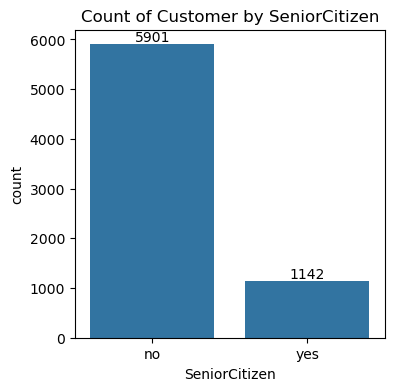

In [17]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "SeniorCitizen" , data = df)
plt.title("Count of Customer by SeniorCitizen")
ax.bar_label(ax.containers[0])
plt.show()

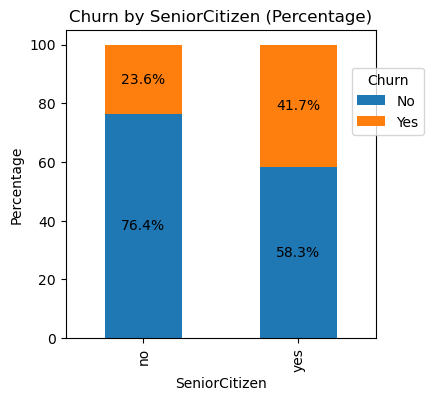

In [18]:
ct = pd.crosstab(df["SeniorCitizen"], df["Churn"])

# Convert counts to percentages
ct_perc = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot stacked bar
ax = ct_perc.plot(kind="bar", stacked=True, figsize=(4,4), color = ['#1f77b4' , '#ff7f0e'])

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

plt.title("Churn by SeniorCitizen (Percentage)")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen")
plt.legend(title="Churn" , bbox_to_anchor = (0.9,0.9))
plt.show()

#Comparative a greater percentage of people in senior citizen category have churned

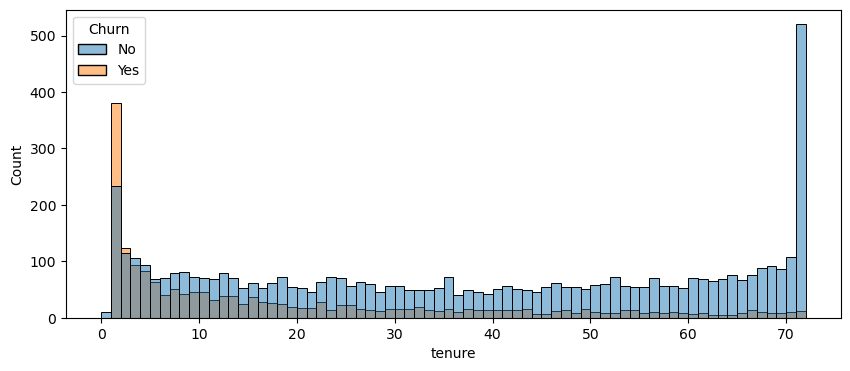

In [20]:
plt.figure(figsize = (10,4))
sns.histplot(x = "tenure", data = df , hue = "Churn", bins = 72)
plt.show()

#people who have used our services for a long time have stayed and people who haveused our services
#1 or 2 month have churned

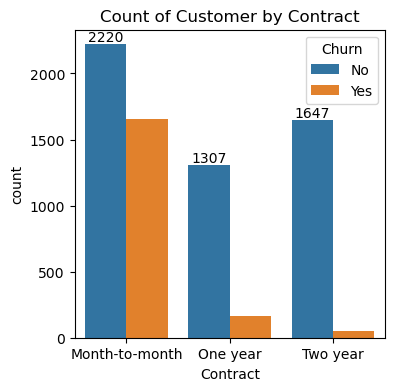

In [22]:
plt.figure(figsize= (4,4))
ax = sns.countplot(x = "Contract" , data = df , hue = "Churn")
plt.title("Count of Customer by Contract")
ax.bar_label(ax.containers[0])
plt.show()

#people who have month to month contract are likely to churn the from those who have 1 or 2 years of contract

In [24]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

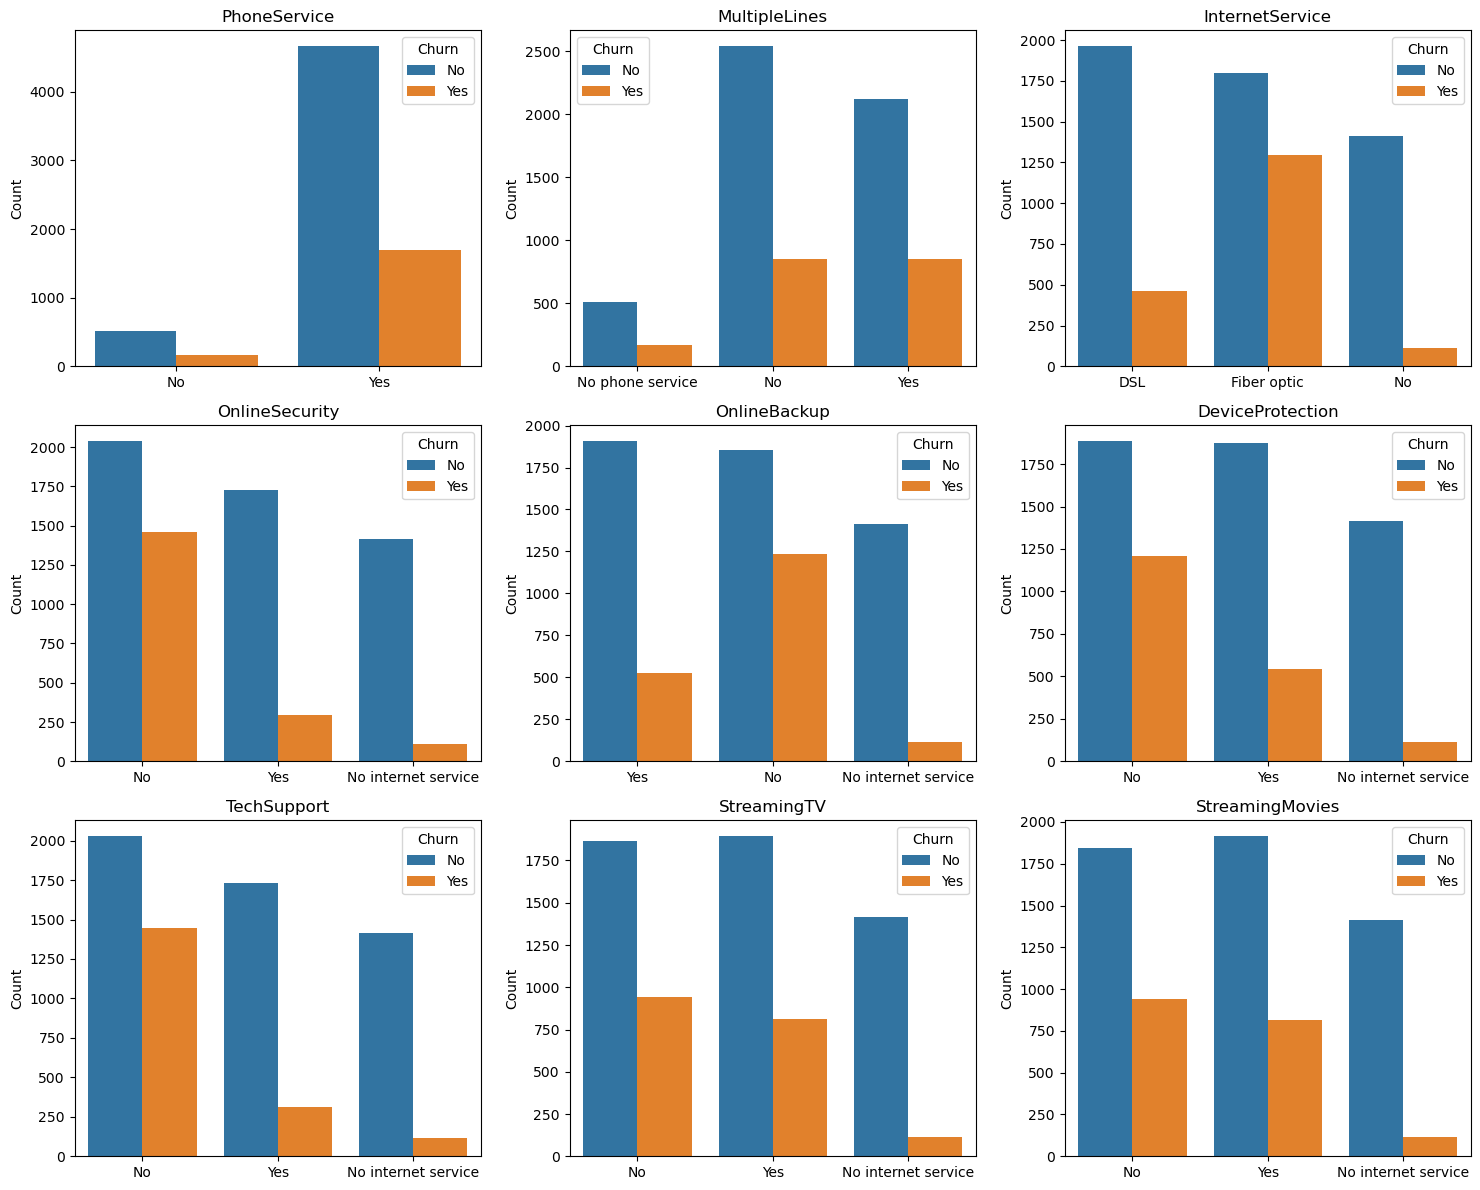

In [25]:
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for subplot grid
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols  # auto calculate rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()   # flatten 2D axes array into 1D for easy indexing

for i, col in enumerate(cols):
    sns.countplot(x=df[col], ax=axes[i] , hue = df["Churn"])
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#The Majority of Customers who do not churn tend to have services like PhoneService, InternetService(particularly DSL),and onlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeable higher when these services are not used or are unavailable

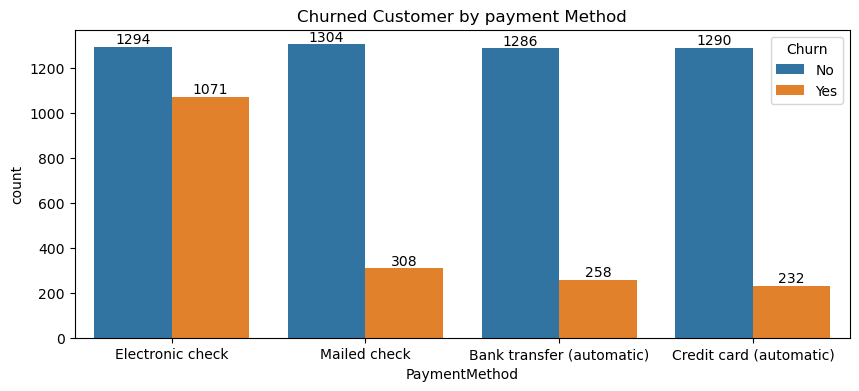

In [27]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x = "PaymentMethod" , data = df , hue = "Churn")
plt.title("Churned Customer by payment Method")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

#customer likely to churn when he is using electronic check as payment method